In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
loan4 = pd.read_csv('Cleaned_loan.csv')
loan4.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,Default_Binary,delinq_2yrs_cat,inq_last_6mths_cat,total_rec_late_fee_cat,recoveries_cat,collection_recovery_fee_cat,pub_rec_cat
0,1077501,5000.0,5000.0,4975.0,36,0.1065,162.87,B,10.0,RENT,...,171.62,80559.0,23700.0,0,no,yes,no,no,no,no
1,1077430,2500.0,2500.0,2500.0,60,0.1527,59.83,C,1.0,RENT,...,119.66,80559.0,23700.0,1,no,yes,no,yes,yes,no
2,1077175,2400.0,2400.0,2400.0,36,0.1596,84.33,C,10.0,RENT,...,649.91,80559.0,23700.0,0,no,yes,no,no,no,no
3,1076863,10000.0,10000.0,10000.0,36,0.1349,339.31,C,10.0,RENT,...,357.48,80559.0,23700.0,0,no,yes,yes,no,no,no
4,1075358,3000.0,3000.0,3000.0,60,0.1269,67.79,B,1.0,RENT,...,67.79,80559.0,23700.0,0,no,no,no,no,no,no


In [3]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 36 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null int64
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
addr_state                     842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal         

In [4]:
loan4['term'] = loan4['term'].apply(str)

In [5]:
loan4.drop('addr_state', axis = 1, inplace = True)

In [6]:
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 35 columns):
id                             842067 non-null int64
loan_amnt                      842067 non-null float64
funded_amnt                    842067 non-null float64
funded_amnt_inv                842067 non-null float64
term                           842067 non-null object
int_rate                       842067 non-null float64
installment                    842067 non-null float64
grade                          842067 non-null object
emp_length                     842067 non-null float64
home_ownership                 842067 non-null object
annual_inc                     842067 non-null float64
verification_status            842067 non-null object
purpose                        842067 non-null object
dti                            842067 non-null float64
open_acc                       842067 non-null float64
revol_bal                      842067 non-null float64
revol_util      

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
transform = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','tot_cur_bal','total_rev_hi_lim']
loan4[transform] = scaler.fit_transform(loan4[transform])
loan4.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,Default_Binary,delinq_2yrs_cat,inq_last_6mths_cat,total_rec_late_fee_cat,recoveries_cat,collection_recovery_fee_cat,pub_rec_cat
0,1077501,0.130435,0.130435,0.142143,36,0.225180,0.102952,B,1.0,RENT,...,0.004705,0.01007,0.00237,0,no,yes,no,no,no,no
1,1077430,0.057971,0.057971,0.071429,60,0.420363,0.030886,C,0.0,RENT,...,0.003281,0.01007,0.00237,1,no,yes,no,yes,yes,no
2,1077175,0.055072,0.055072,0.068571,36,0.449514,0.048021,C,1.0,RENT,...,0.017818,0.01007,0.00237,0,no,yes,no,no,no,no
3,1076863,0.275362,0.275362,0.285714,36,0.345163,0.226355,C,1.0,RENT,...,0.009801,0.01007,0.00237,0,no,yes,yes,no,no,no
4,1075358,0.072464,0.072464,0.085714,60,0.311365,0.036453,B,0.0,RENT,...,0.001859,0.01007,0.00237,0,no,no,no,no,no,no


In [9]:
features = ['term','grade','home_ownership','verification_status','purpose','initial_list_status','delinq_2yrs_cat','inq_last_6mths_cat','total_rec_late_fee_cat','recoveries_cat','collection_recovery_fee_cat','pub_rec_cat']
loan4 = pd.get_dummies(loan4, columns = features)
loan4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842067 entries, 0 to 842066
Data columns (total 68 columns):
id                                  842067 non-null int64
loan_amnt                           842067 non-null float64
funded_amnt                         842067 non-null float64
funded_amnt_inv                     842067 non-null float64
int_rate                            842067 non-null float64
installment                         842067 non-null float64
emp_length                          842067 non-null float64
annual_inc                          842067 non-null float64
dti                                 842067 non-null float64
open_acc                            842067 non-null float64
revol_bal                           842067 non-null float64
revol_util                          842067 non-null float64
total_acc                           842067 non-null float64
out_prncp                           842067 non-null float64
out_prncp_inv                       842067 non-null

In [10]:
users = loan4['id']

In [11]:
loan4.drop('id', axis = 1, inplace = True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
X = loan4.loc[:, loan4.columns != 'Default_Binary']
y = loan4.loc[:, loan4.columns == 'Default_Binary']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (589446, 66)
Number transactions y_train dataset:  (589446, 1)
Number transactions X_test dataset:  (252621, 66)
Number transactions y_test dataset:  (252621, 1)


In [17]:
sm = SMOTE(random_state=0)

In [18]:
columns_x = X_train.columns
columns_y = y_train.columns
sm_X,sm_y = sm.fit_sample(X_train, y_train.values.ravel())
        

In [19]:
sm_X = pd.DataFrame(data=sm_X,columns=columns_x)
sm_y = pd.DataFrame(data=sm_y,columns=columns_y)

In [20]:
print("length of oversampled data is ",len(sm_X))
print("Number of defaulters",len(sm_y[sm_y['Default_Binary']==1]))
print("Number of non-defaulters",len(sm_y[sm_y['Default_Binary']==0]))


length of oversampled data is  1089672
Number of defaulters 544836
Number of non-defaulters 544836


In [23]:
logreg = LogisticRegression(class_weight = 'balanced', solver = 'sag')

logreg.fit(sm_X,sm_y.values.ravel())

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

,Default_Binary


In [41]:
import statsmodels.api as st
logit_model=st.Logit(sm_y-1,sm_X, missing='drop')
result=logit_model.fit()
print(result.summary2())

ValueError: endog must be in the unit interval.

In [ ]:
### Use RFE to choose the best features

In [ ]:
### Run the model

In [ ]:
### Check for p-values. Eliminate those variables which are less than 0.05.

In [ ]:
### Again fit the model

In [ ]:
### Check for accuracy.

### standardization.

In [14]:
stand = final_loan[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt']]

In [15]:
normalized = (stand-stand.min())/(stand.max()-stand.min())

In [16]:
final_loan = final_loan.drop(['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','emp_length','annual_inc','dti','open_acc','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt'], 1)

In [17]:
final_loan = pd.concat([final_loan, normalized], axis =1)

In [20]:
(final_loan.isnull().sum()/len(final_loan.index))*100

Default_Binary                     0.000000
delinq_2yrs_cat_no                 0.000000
delinq_2yrs_cat_yes                0.000000
inq_last_6mths_cat_no              0.000000
inq_last_6mths_cat_yes             0.000000
rec_late_fee_no                    0.000000
rec_late_fee_yes                   0.000000
recoveries_cat_no                  0.000000
recoveries_cat_yes                 0.000000
collection_recovery_fee_cat_no     0.000000
collection_recovery_fee_cat_yes    0.000000
pub_rec_cat_no                     0.000000
pub_rec_cat_yes                    0.000000
initial_list_status_f              0.000000
initial_list_status_w              0.000000
purpose_car                        0.000000
purpose_credit_card                0.000000
purpose_debt_consolidation         0.000000
purpose_educational                0.000000
purpose_home_improvement           0.000000
purpose_house                      0.000000
purpose_major_purchase             0.000000
purpose_medical                 

In [21]:
final_loan = final_loan[~np.isnan(final_loan['open_acc'])]

In [22]:
final_loan = final_loan[~np.isnan(final_loan['total_acc'])]

In [23]:
final_loan.isnull().sum()

Default_Binary                     0
delinq_2yrs_cat_no                 0
delinq_2yrs_cat_yes                0
inq_last_6mths_cat_no              0
inq_last_6mths_cat_yes             0
rec_late_fee_no                    0
rec_late_fee_yes                   0
recoveries_cat_no                  0
recoveries_cat_yes                 0
collection_recovery_fee_cat_no     0
collection_recovery_fee_cat_yes    0
pub_rec_cat_no                     0
pub_rec_cat_yes                    0
initial_list_status_f              0
initial_list_status_w              0
purpose_car                        0
purpose_credit_card                0
purpose_debt_consolidation         0
purpose_educational                0
purpose_home_improvement           0
purpose_house                      0
purpose_major_purchase             0
purpose_medical                    0
purpose_moving                     0
purpose_other                      0
purpose_renewable_energy           0
purpose_small_business             0
p

### Training the model.

In [24]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

C:\Users\sanjo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
X= final_loan.drop(['Default_Binary'], axis=1)
y= final_loan['Default_Binary']

In [26]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression(class_weight = 'balanced')

output = logreg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
output_table = pd.DataFrame(dict(coefficients = output.params, SE = output.bse, z = output.tvalues, p_values = output.pvalues))
#get coefficients and pvalues
print(output_table)

In [37]:
y_pred = logreg.predict(X_test)

In [38]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[245770,    190],
       [  6899,  13346]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99    245960
          1       0.99      0.66      0.79     20245

avg / total       0.97      0.97      0.97    266205



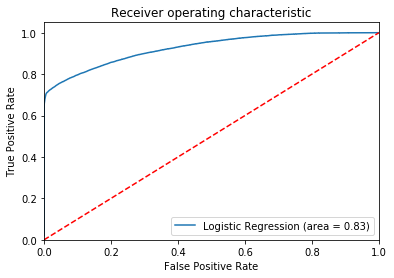

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()